# 0.0. Imports

In [1]:
import datetime
from math import isnan

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import inflection

from IPython.core.display import HTML

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

In [3]:
jupyter_settings()

## 0.2. Loading data

In [4]:
df_sales_raw = pd.read_csv( 'data/train.csv', low_memory=False )
df_store_raw = pd.read_csv( 'data/store.csv', low_memory=False )

# Merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0. DESCRIÇÃO DOS DADOS

In [5]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
cols_old = list(df1.columns)

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2. Data Dimensions

In [8]:
print( f'Number of Rows: {df1.shape[0]}' )
print( f'Number of Rows: {df1.shape[1]}' )

Number of Rows: 1017209
Number of Rows: 18


## 1.3. Data Types

In [9]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fill out NA

In [11]:
# competition_distance

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if isnan( x ) else x )

# competition_open_since_month

df1['competition_open_since_month'] = df1.apply( 
    lambda x: x['date'].month 
        if isnan( x['competition_open_since_month'] ) 
        else x['competition_open_since_month'],
    axis=1
)

# competition_open_since_year

df1['competition_open_since_year'] = df1.apply( 
    lambda x: x['date'].year 
        if isnan( x['competition_open_since_year'] ) 
        else x['competition_open_since_year'],
    axis=1
)


# promo2_since_week

df1['promo2_since_week'] = df1.apply( 
    lambda x: x['date'].week 
        if isnan( x['promo2_since_week'] ) 
        else x['promo2_since_week'],
    axis=1
)

# promo2_since_year

df1['promo2_since_year'] = df1.apply( 
    lambda x: x['date'].year
        if isnan( x['promo2_since_year'] ) 
        else x['promo2_since_year'],
    axis=1
)

# promo_interval

month_map = { 1: 'Jan', 2: ' Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
              7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
            }

df1['promo_interval'] = df1['promo_interval'].fillna(0)

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(
    lambda x: 0 if x['promo_interval'] == 0 else 1 
        if x['month_map'] in x['promo_interval'].split( ',' ) else 0,
    axis=1 
)

In [12]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [13]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [15]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7. Descriptive Statistical

In [16]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.7.1. Numerical Attributes

In [17]:
#  Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<Axes: xlabel='competition_distance', ylabel='Count'>

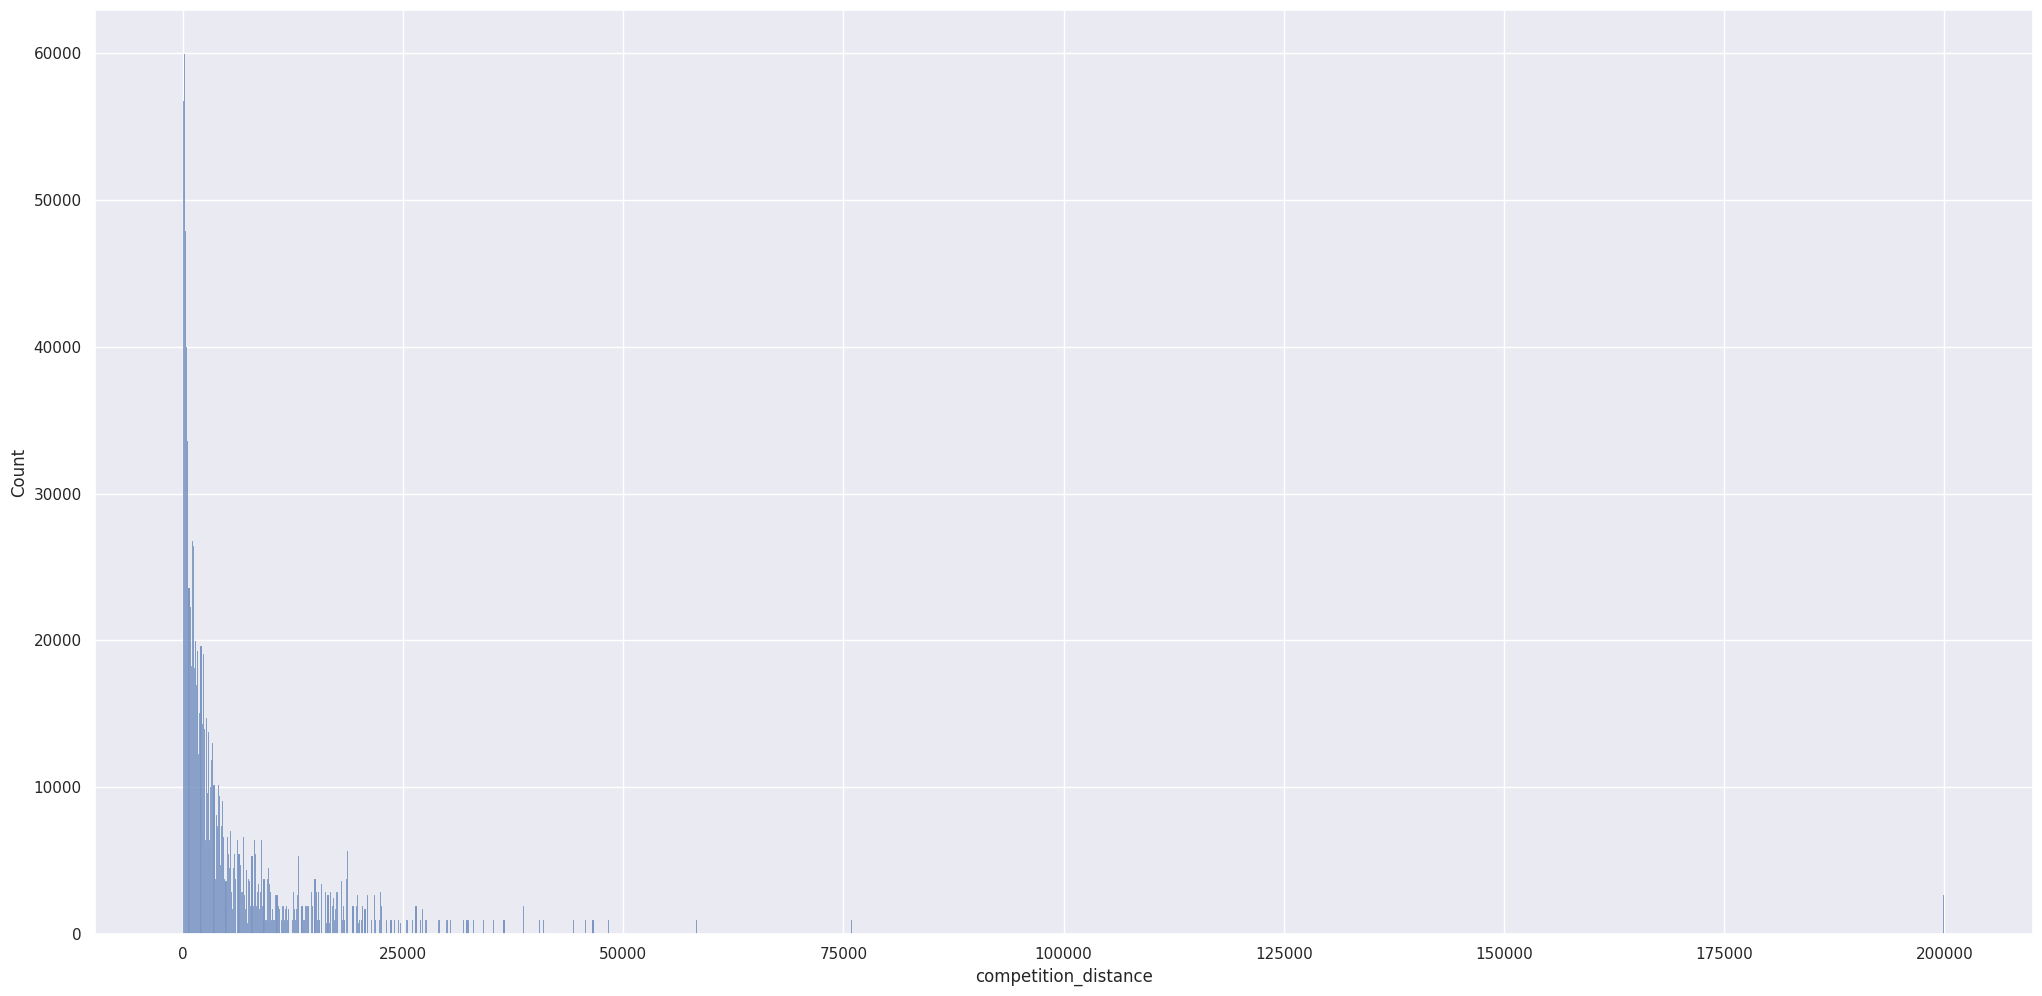

In [18]:
sns.histplot( df1['competition_distance'] )

### 1.7.2. Categorical Attributes

In [19]:
cat_attributes.apply( lambda x: x.nunique() )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

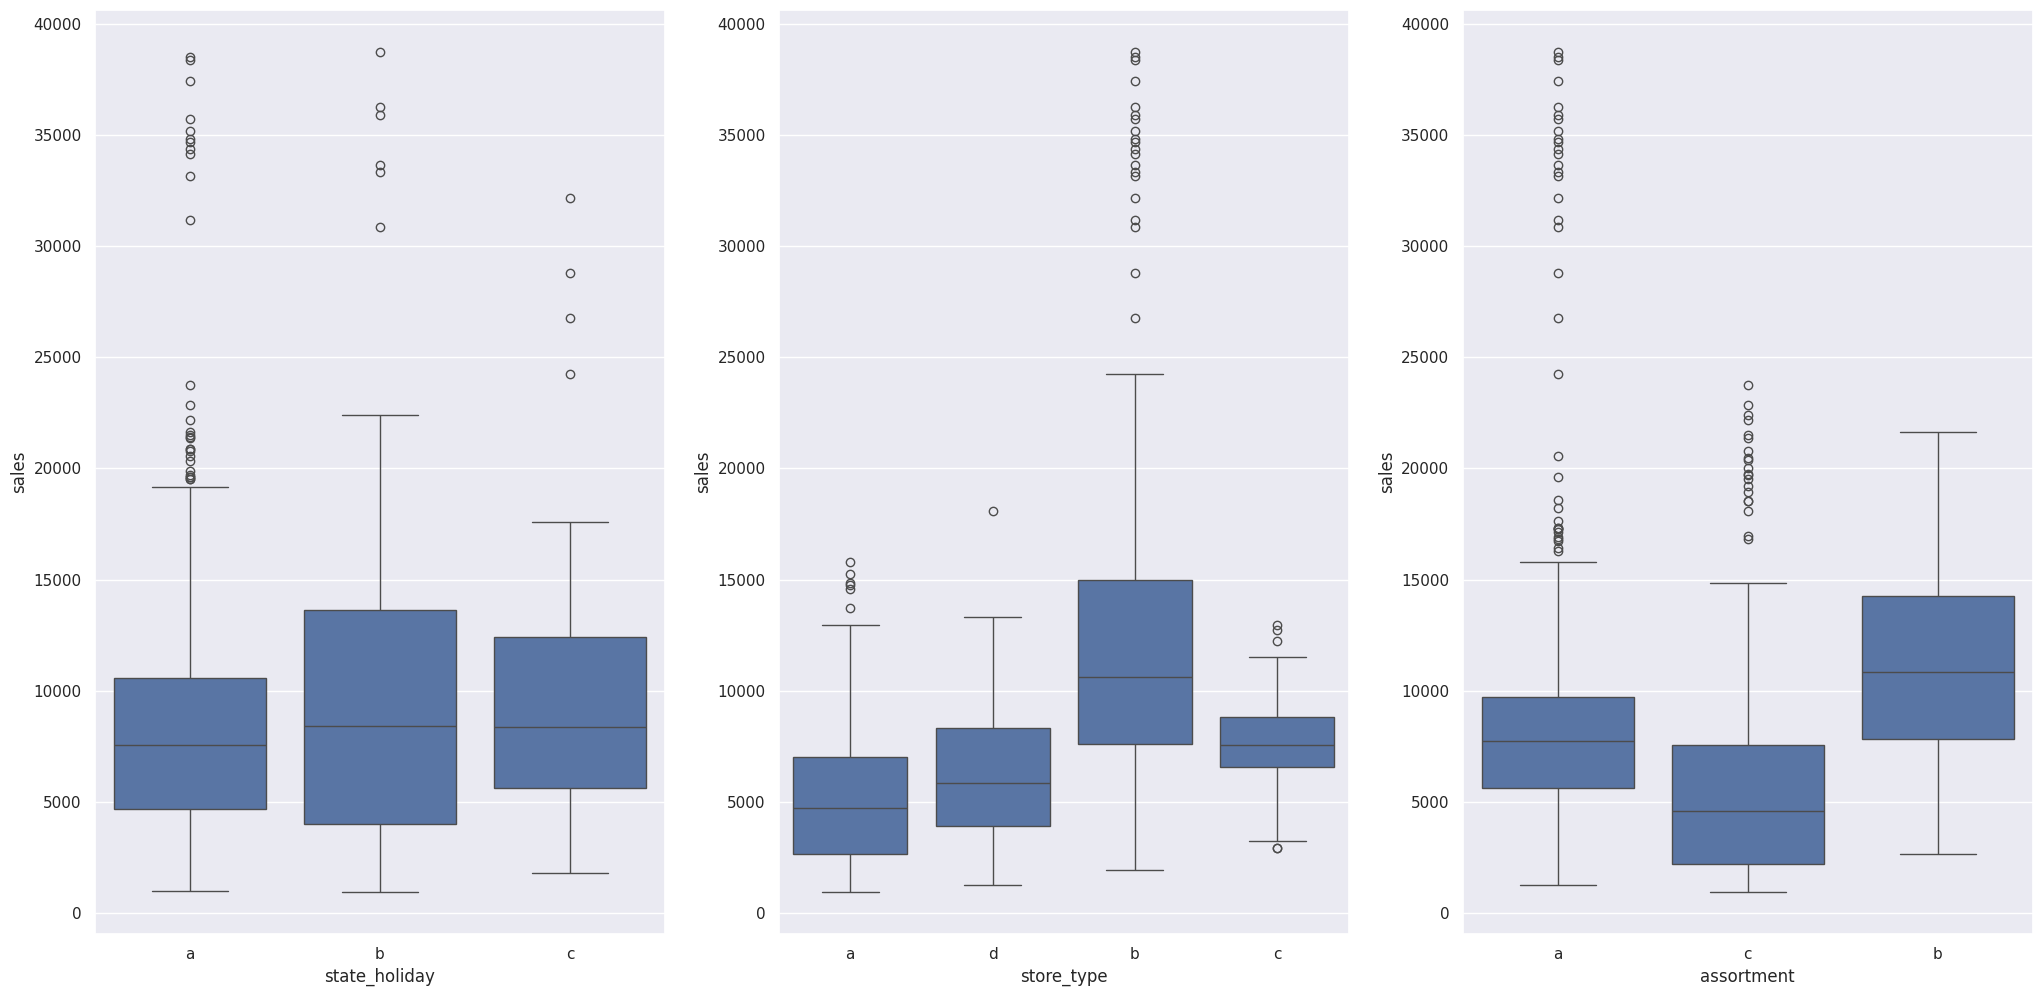

In [20]:
aux = df1[( df1['state_holiday'] != '0' ) & ( df1['sales'] > 0 )]


plt.subplot(1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot(1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot(1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux )

# 2.0. FEATURE ENGINEERING

In [21]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipóteses

### 2.1.1. Mapa Mental

![Texto Alternativo](img/MindMapHypothesis.png)

## 2.2. Criação de Hipóteses

### 2.2.1. Hipóteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais

**4.** Lojas com maior sortimento deveriam vender mais

**5.** Lojas com competidores mais próximos deveriam vender menos

**6.** Lojas com competidores à mais tempo deveriam vender menos

### 2.2.2. Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3. Hipóteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante feriados escolares.

## 2.3. Lista Final de Hipóteses

**1.** Lojas com maior sortimento deveriam vender mais

**2.** Lojas com competidores mais próximos deveriam vender menos

**3.** Lojas com competidores à mais tempo deveriam vender menos

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais promoções consecutivas deveriam vender mais.

**6.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**7.** Lojas deveriam vender mais ao longo dos anos.

**8.** Lojas deveriam vender mais no segundo semestre do ano.

**9.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**10.** Lojas deveriam vender menos aos finais de semana.

**11.** Lojas deveriam vender menos durante feriados escolares.

## 2.4. Feature Engineering

In [22]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since
df2['competition_since'] = df2.apply(
    lambda x: datetime.datetime( 
        year=x['competition_open_since_year'],
        month=x['competition_open_since_month'],
        day=1
    ),
    axis=1
)
df2['competition_time_month'] = ( 
    ( df2['date'] - df2['competition_since'] ) / 30 
    ).apply( lambda x: x.days ).astype( int )

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] ) / 7 ).apply( lambda x: x.days ).astype( int )

# assortment
assortment_map = {
    'a': 'basic',
    'b': 'extra',
    'c': 'extended'
}
df2['assortment'] = df2['assortment'].map(assortment_map)

# state holiday
state_holiday_map = {
    'a': 'public holiday',
    'b': 'Easter holiday',
    'c': 'Christmas',
    '0': 'regular_day'
}
df2['state_holiday'] = df2['state_holiday'].map(state_holiday_map)

In [23]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0. FILTRAGEM DE VARIÁVEIS

In [24]:
df3 = df2.copy()

## 3.1 - Filtragem das Linhas

In [25]:
df3 = df3[( df3['open'] != 0 ) & ( df3['sales'] > 0 )]

## 3.2 - Seleção das Colunas

In [26]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

In [27]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [28]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Response Variable

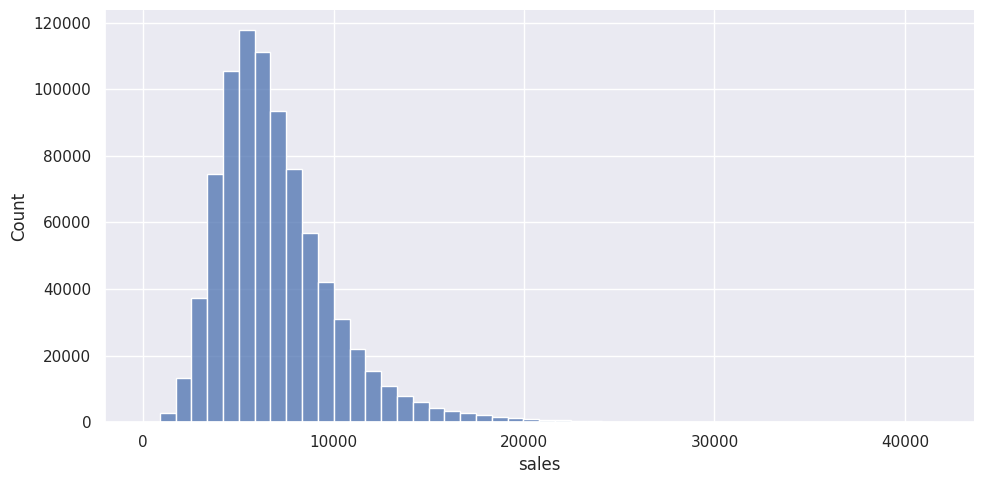

In [29]:
sns.displot( df4['sales'], kde=False, bins=50, aspect=2);

### 4.1.2. Numerical Variable

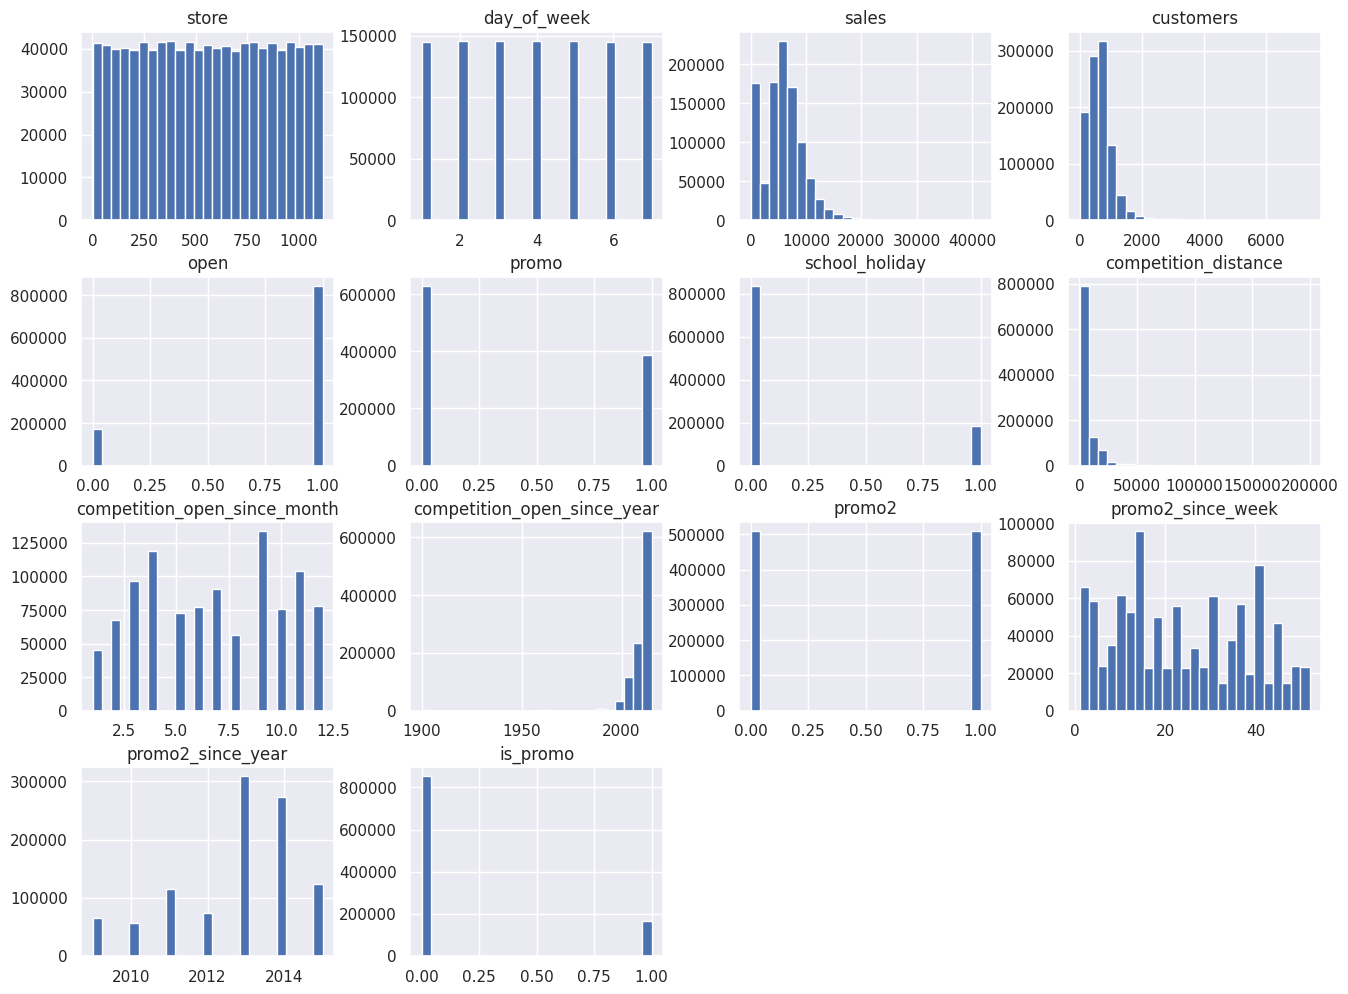

In [30]:
num_attributes.hist( bins=25, figsize=(16,12) );

### 4.1.3. Categorical Variable

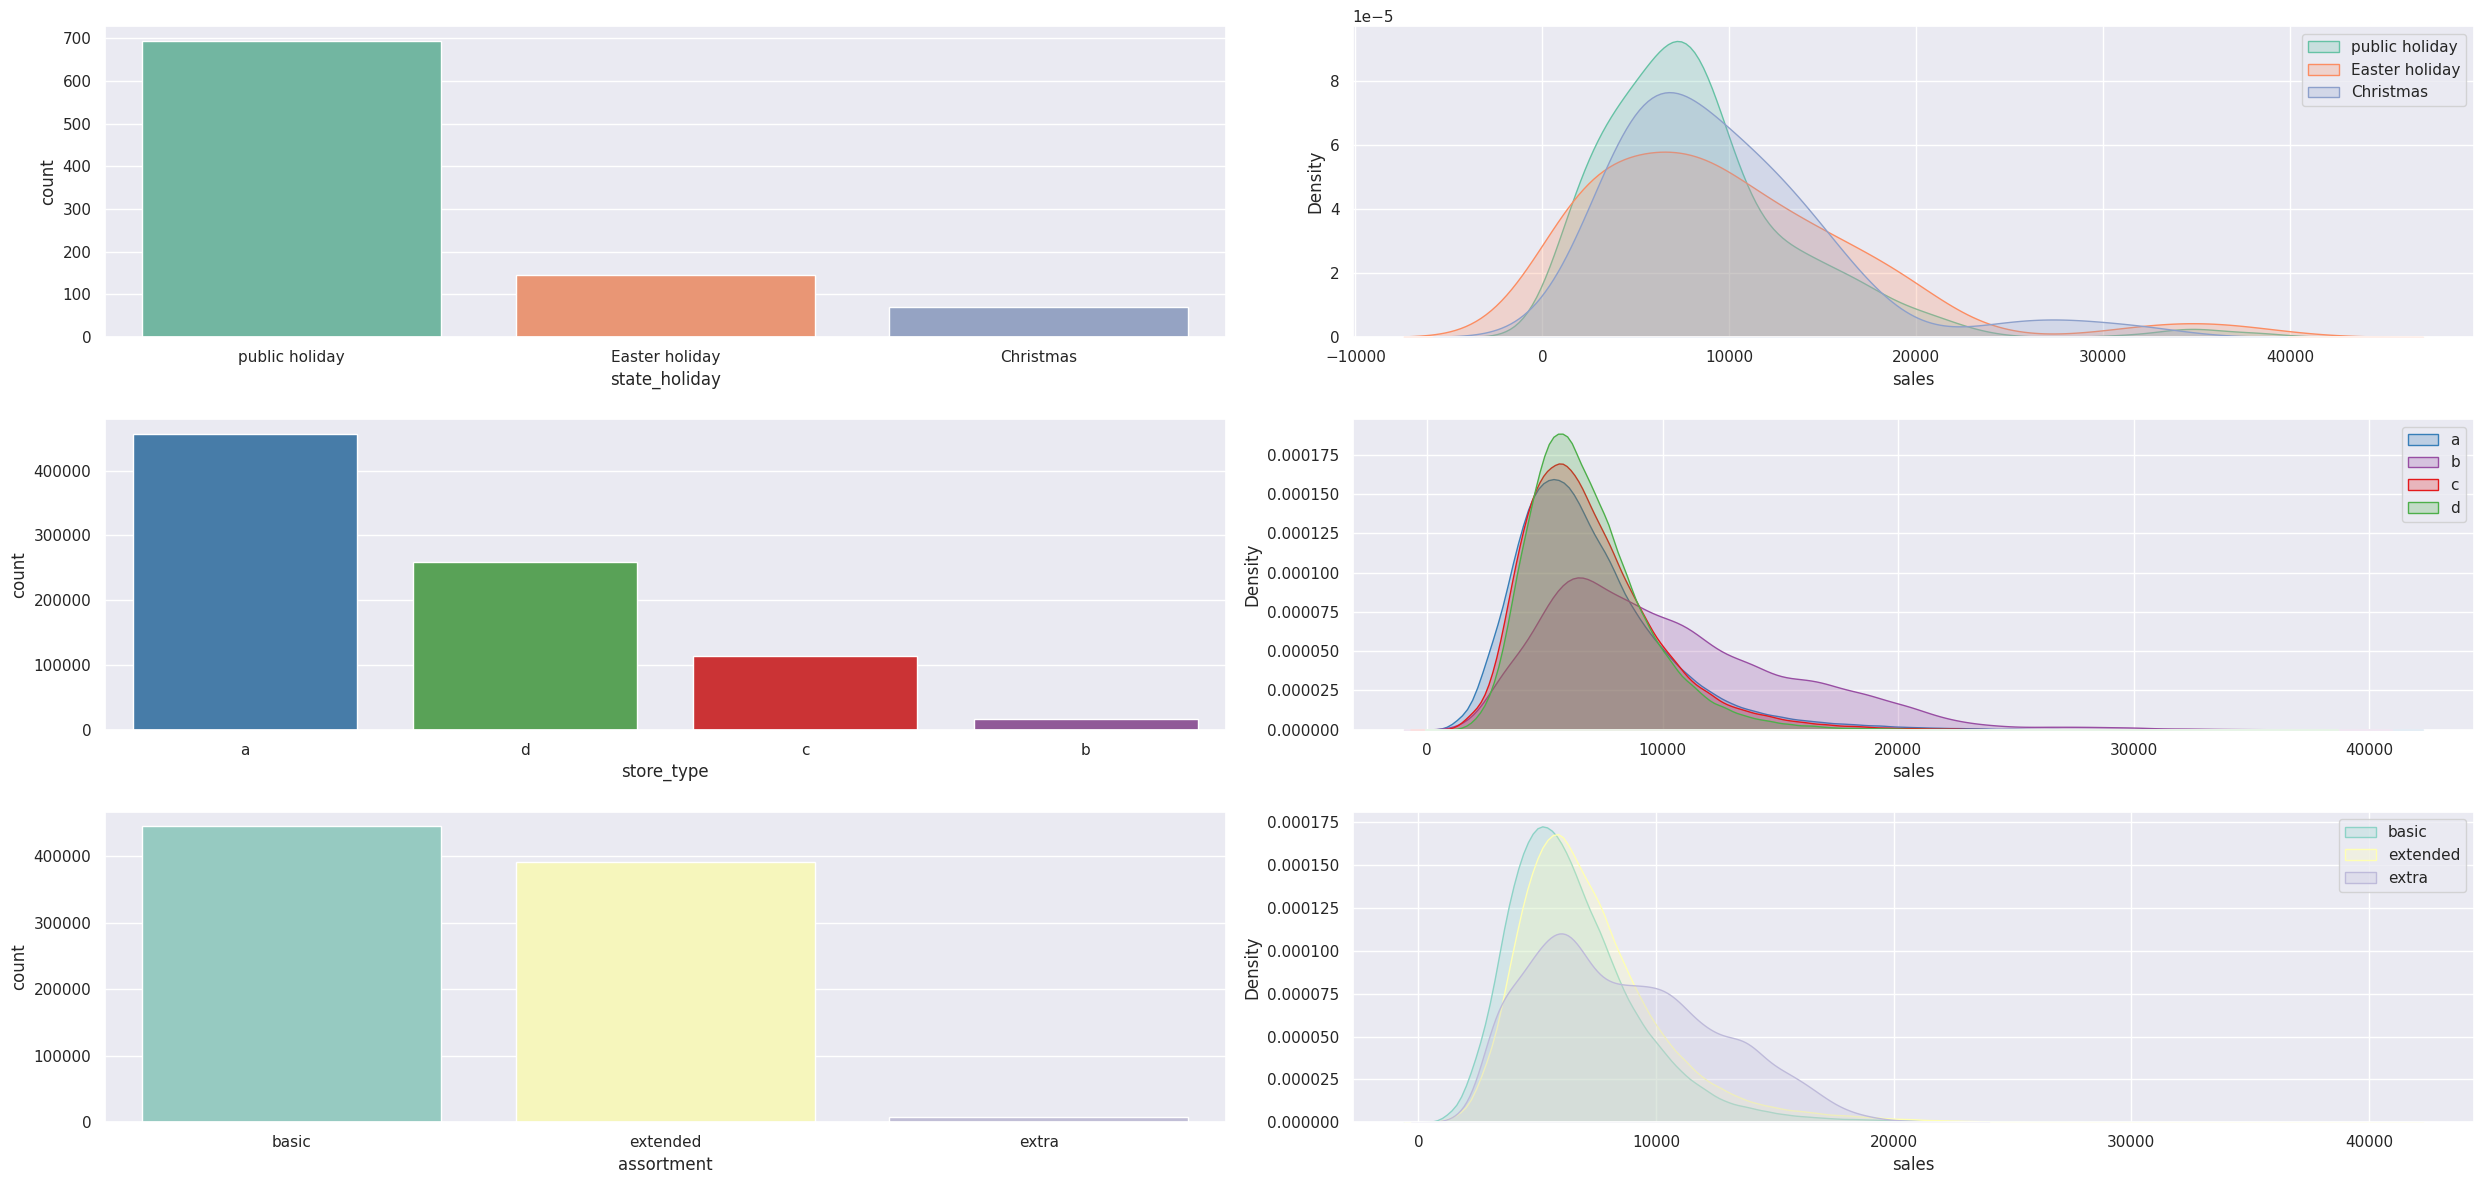

In [31]:
fig, axs = plt.subplots(3, 2, sharex=False)

# state_holiday
df_aux = df4[df4['state_holiday'] != 'regular_day']

sns.countplot( data=df_aux, x='state_holiday', hue='state_holiday', palette='Set2', ax=axs[0, 0] )

sns.kdeplot( data=df4[df4['state_holiday'] == 'public holiday'], x='sales', color='#66c2a5', fill=True, label='public holiday', ax=axs[0, 1] )
sns.kdeplot( data=df4[df4['state_holiday'] == 'Easter holiday'], x='sales', color='#fc8d62', fill=True, label='Easter holiday', ax=axs[0, 1] )
sns.kdeplot( data=df4[df4['state_holiday'] == 'Christmas'], x='sales', color='#8da0cb', fill=True, label='Christmas', ax=axs[0, 1] )
axs[0, 1].legend()

# store_type
sns.countplot( data=df4, x='store_type', hue='store_type', palette='Set1', ax=axs[1, 0], order=df4['store_type'].value_counts().index )

sns.kdeplot( data=df4[df4['store_type'] == 'a'], x='sales', color='#377eb8', fill=True, label='a', ax=axs[1, 1])
sns.kdeplot( data=df4[df4['store_type'] == 'b'], x='sales', color='#984ea3', fill=True, label='b', ax=axs[1, 1] )
sns.kdeplot( data=df4[df4['store_type'] == 'c'], x='sales', color='#e41a1c', fill=True, label='c', ax=axs[1, 1] )
sns.kdeplot( data=df4[df4['store_type'] == 'd'], x='sales', color='#4daf4a', fill=True, label='d', ax=axs[1, 1] )
axs[1, 1].legend()

# assortment
sns.countplot( data=df4, x='assortment', hue='assortment', palette='Set3', ax=axs[2, 0], order=df4['assortment'].value_counts().index )

sns.kdeplot( data=df4[df4['assortment'] == 'basic'], x='sales', color='#8dd3c7', fill=True, label='basic', ax=axs[2, 1])
sns.kdeplot( data=df4[df4['assortment'] == 'extended'], x='sales', color='#ffffb3', fill=True, label='extended', ax=axs[2, 1] )
sns.kdeplot( data=df4[df4['assortment'] == 'extra'], x='sales', color='#bebada', fill=True, label='extra', ax=axs[2, 1] )
axs[2, 1].legend()

plt.tight_layout(h_pad=1.8)
plt.show();

## 4.2. Análise Bivariada

### H1. Lojas com maior sortimento deveriam vender mais

**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS.

<Axes: xlabel='year_week'>

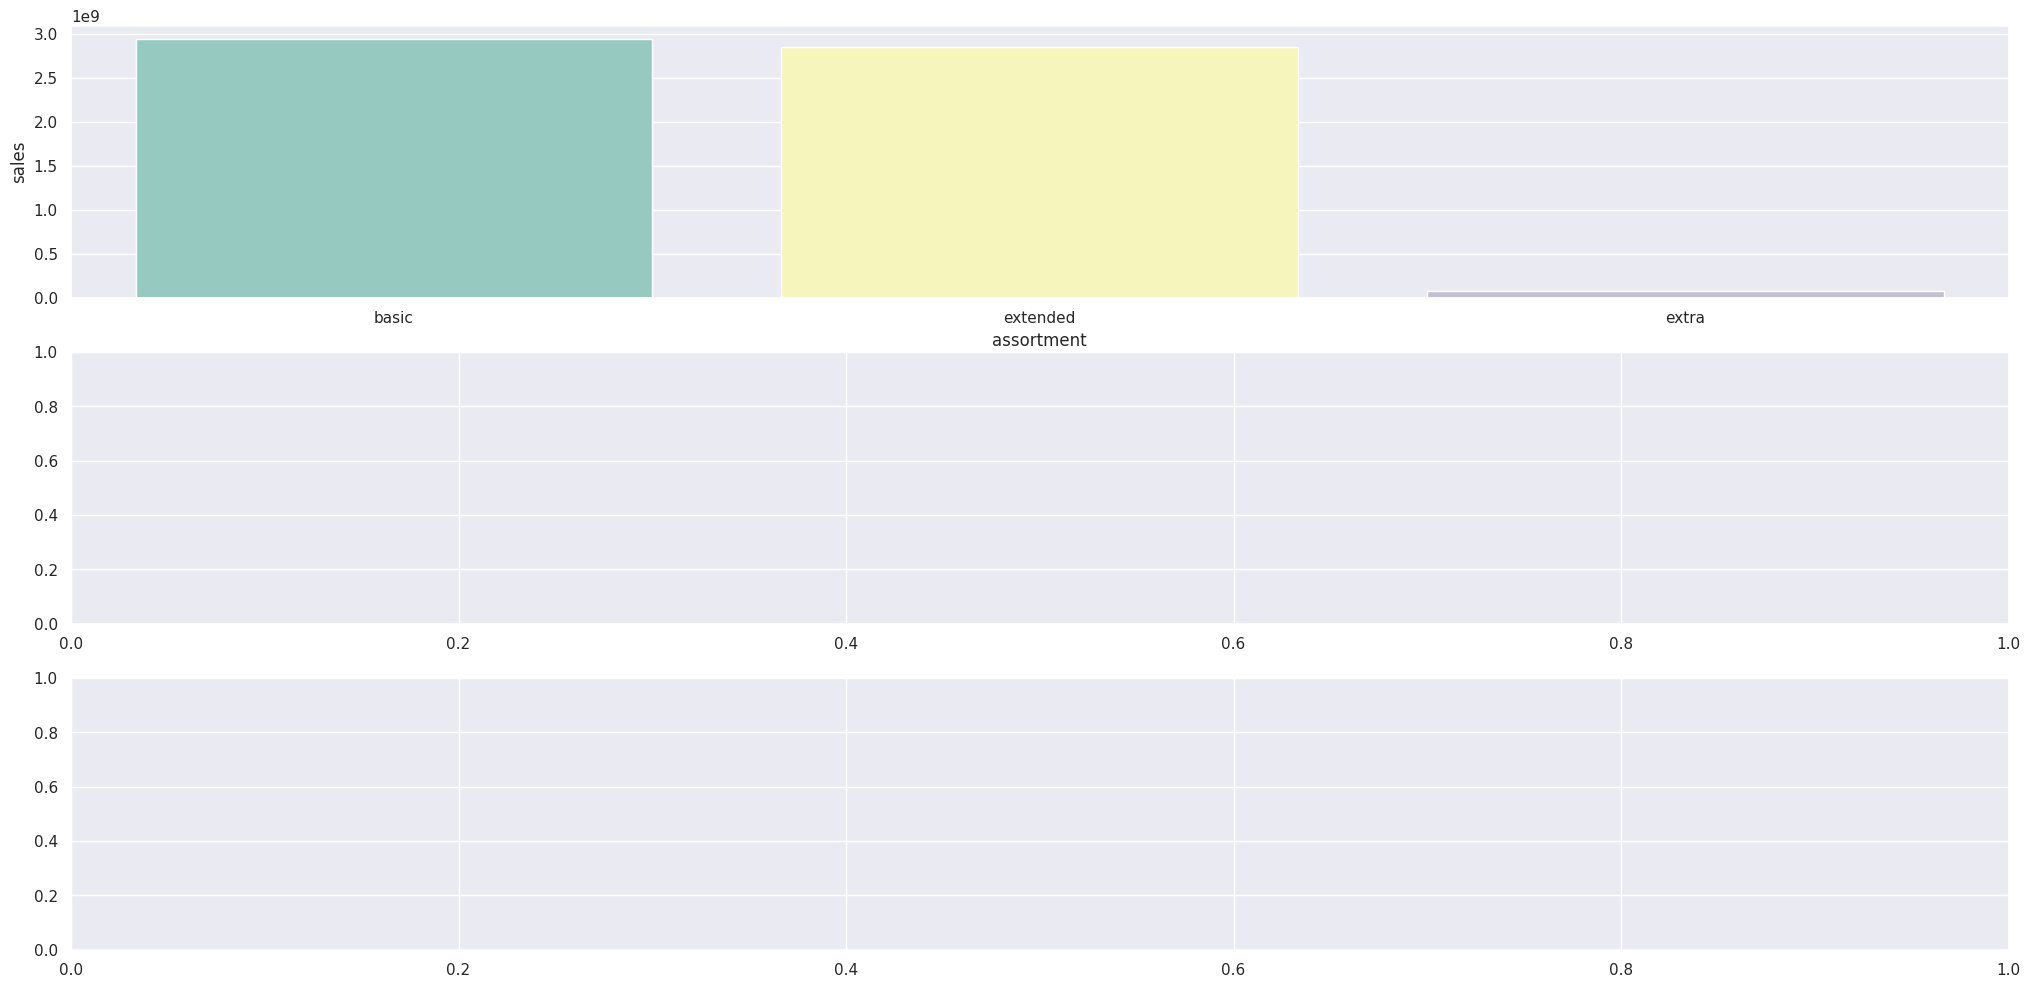

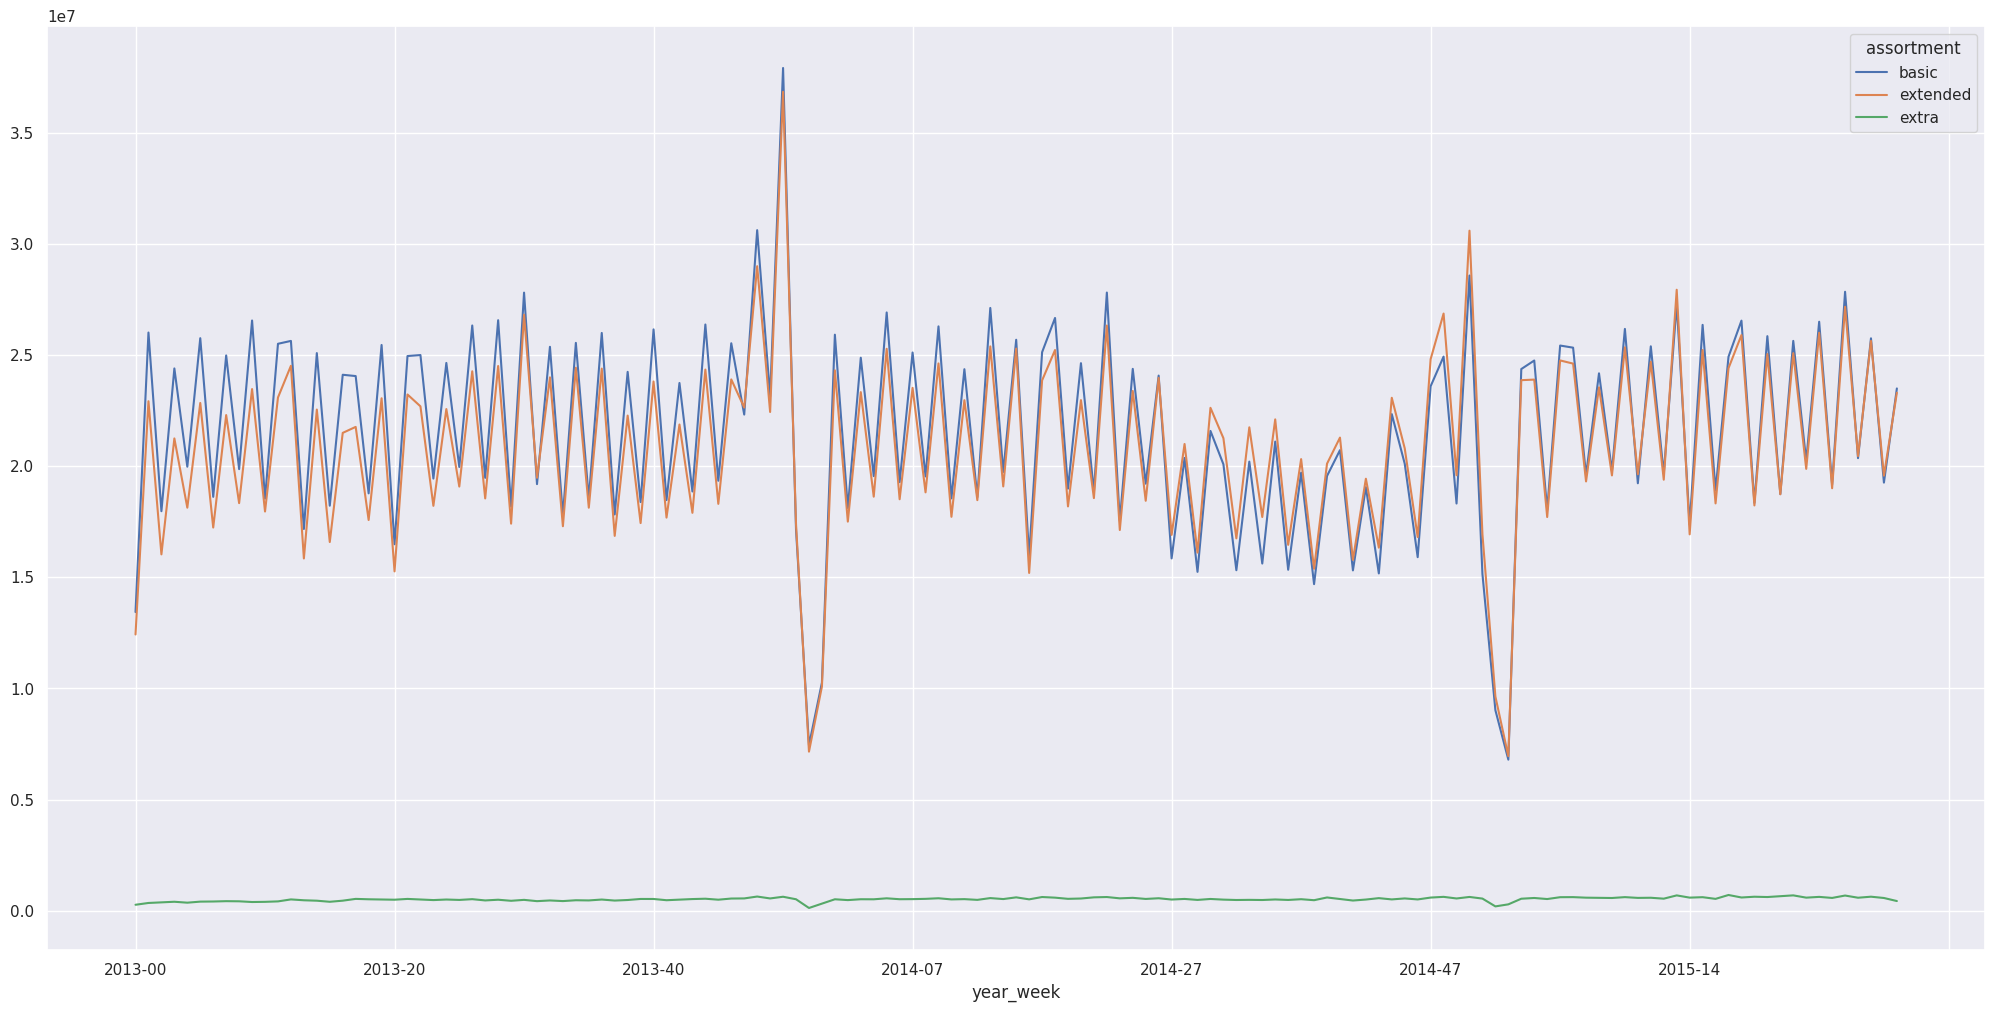

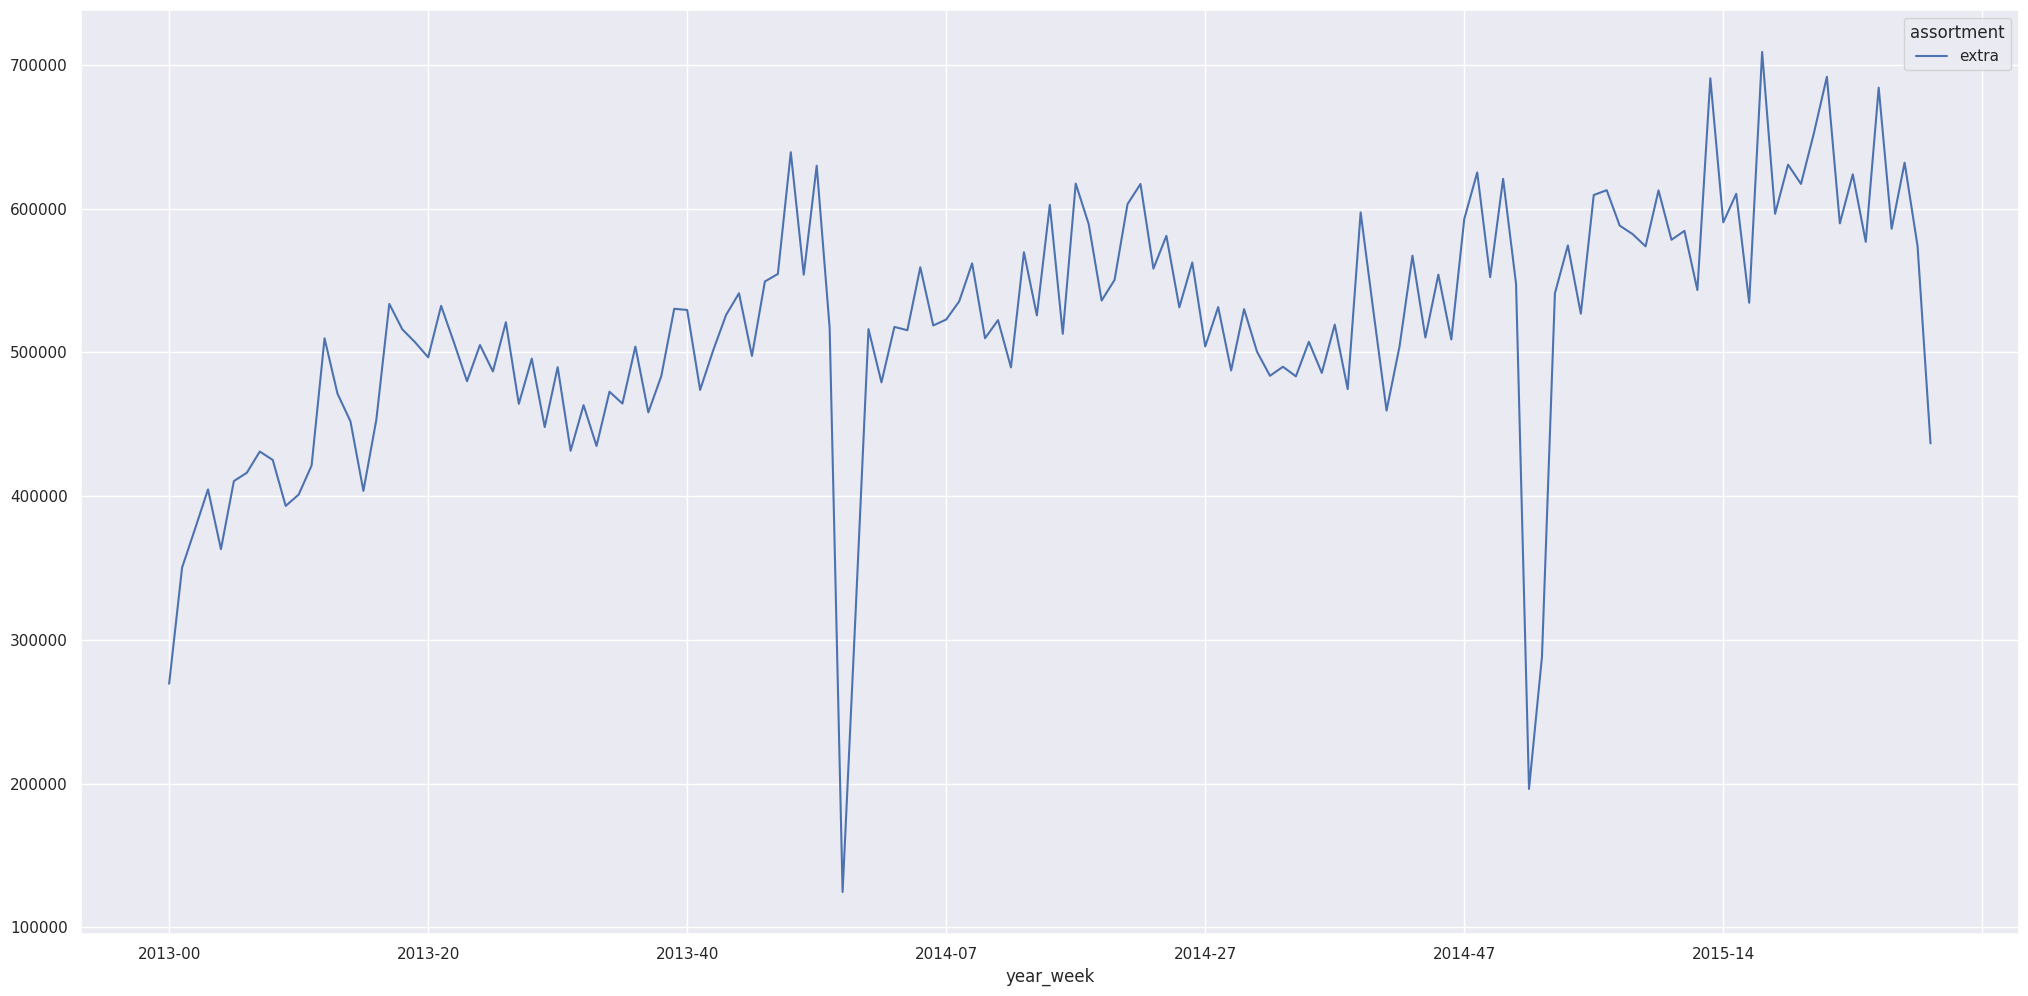

In [32]:
fig, axs = plt.subplots( 3, 1, sharex=False )

aux_h1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( data=aux_h1, x='assortment', y='sales', hue='assortment', palette='Set3', ax=axs[0] )

aux2_h1 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week', 'assortment'] ).sum().reset_index()
aux2_h1.pivot( index='year_week', columns='assortment', values='sales' ).plot()

aux3_h1 = aux2_h1[aux2_h1['assortment'] == 'extra']
aux3_h1.pivot( index='year_week', columns='assortment', values='sales' ).plot()

### H2. Lojas com competidores mais próximos deveriam vender menos.

**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS.

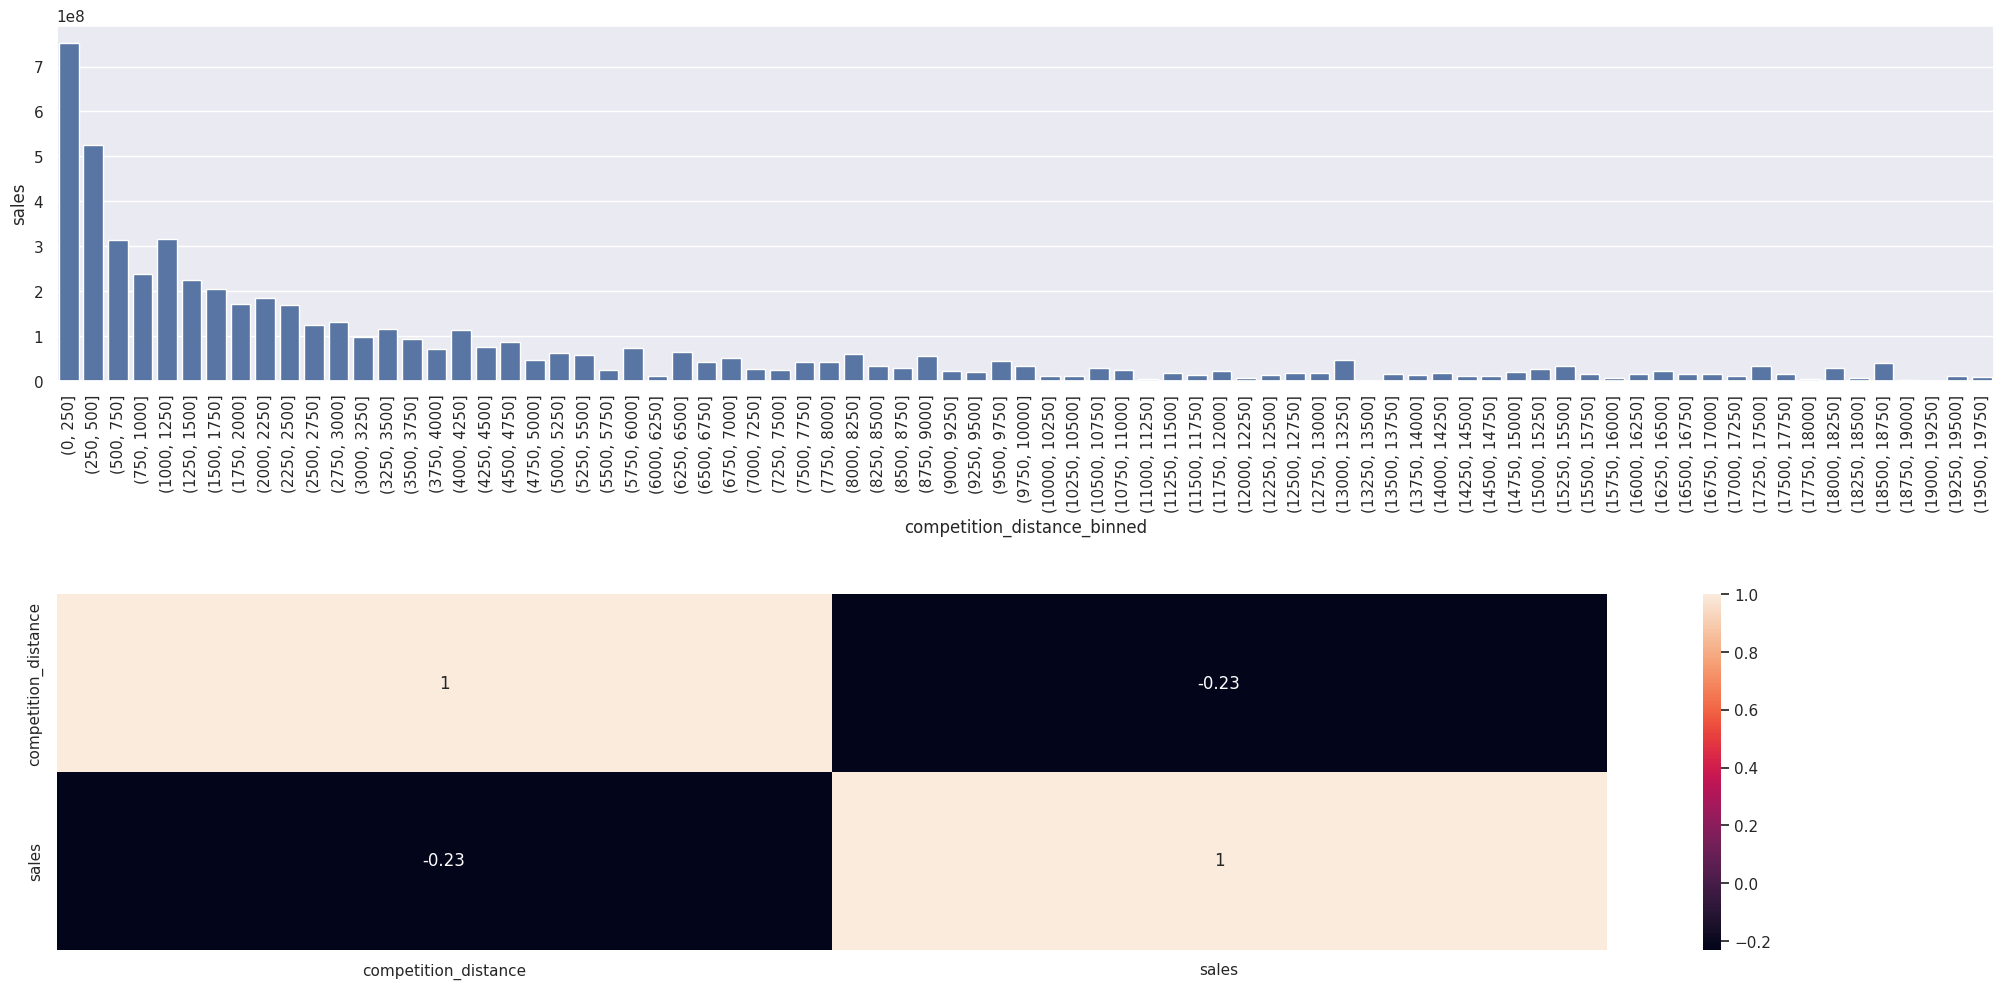

In [33]:
df_aux = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

bins = list( np.arange( 0, 20000, 250 ) )
df_aux['competition_distance_binned'] = pd.cut( df_aux['competition_distance'], bins=bins )
aux = df_aux[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned', observed=False ).sum().reset_index()

fig, axs = plt.subplots(2, 1, sharex=False)

axs[0].tick_params(axis='x', rotation=90)
sns.barplot( x='competition_distance_binned', y='sales', data=aux, ax=axs[0]);

sns.heatmap( df_aux[['competition_distance', 'sales']].corr( method='pearson' ), annot=True, ax=axs[1] );

fig.subplots_adjust(hspace=0.6)

### H3. Lojas com competidores à mais tempo deveriam vender mais.

**FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem menos.

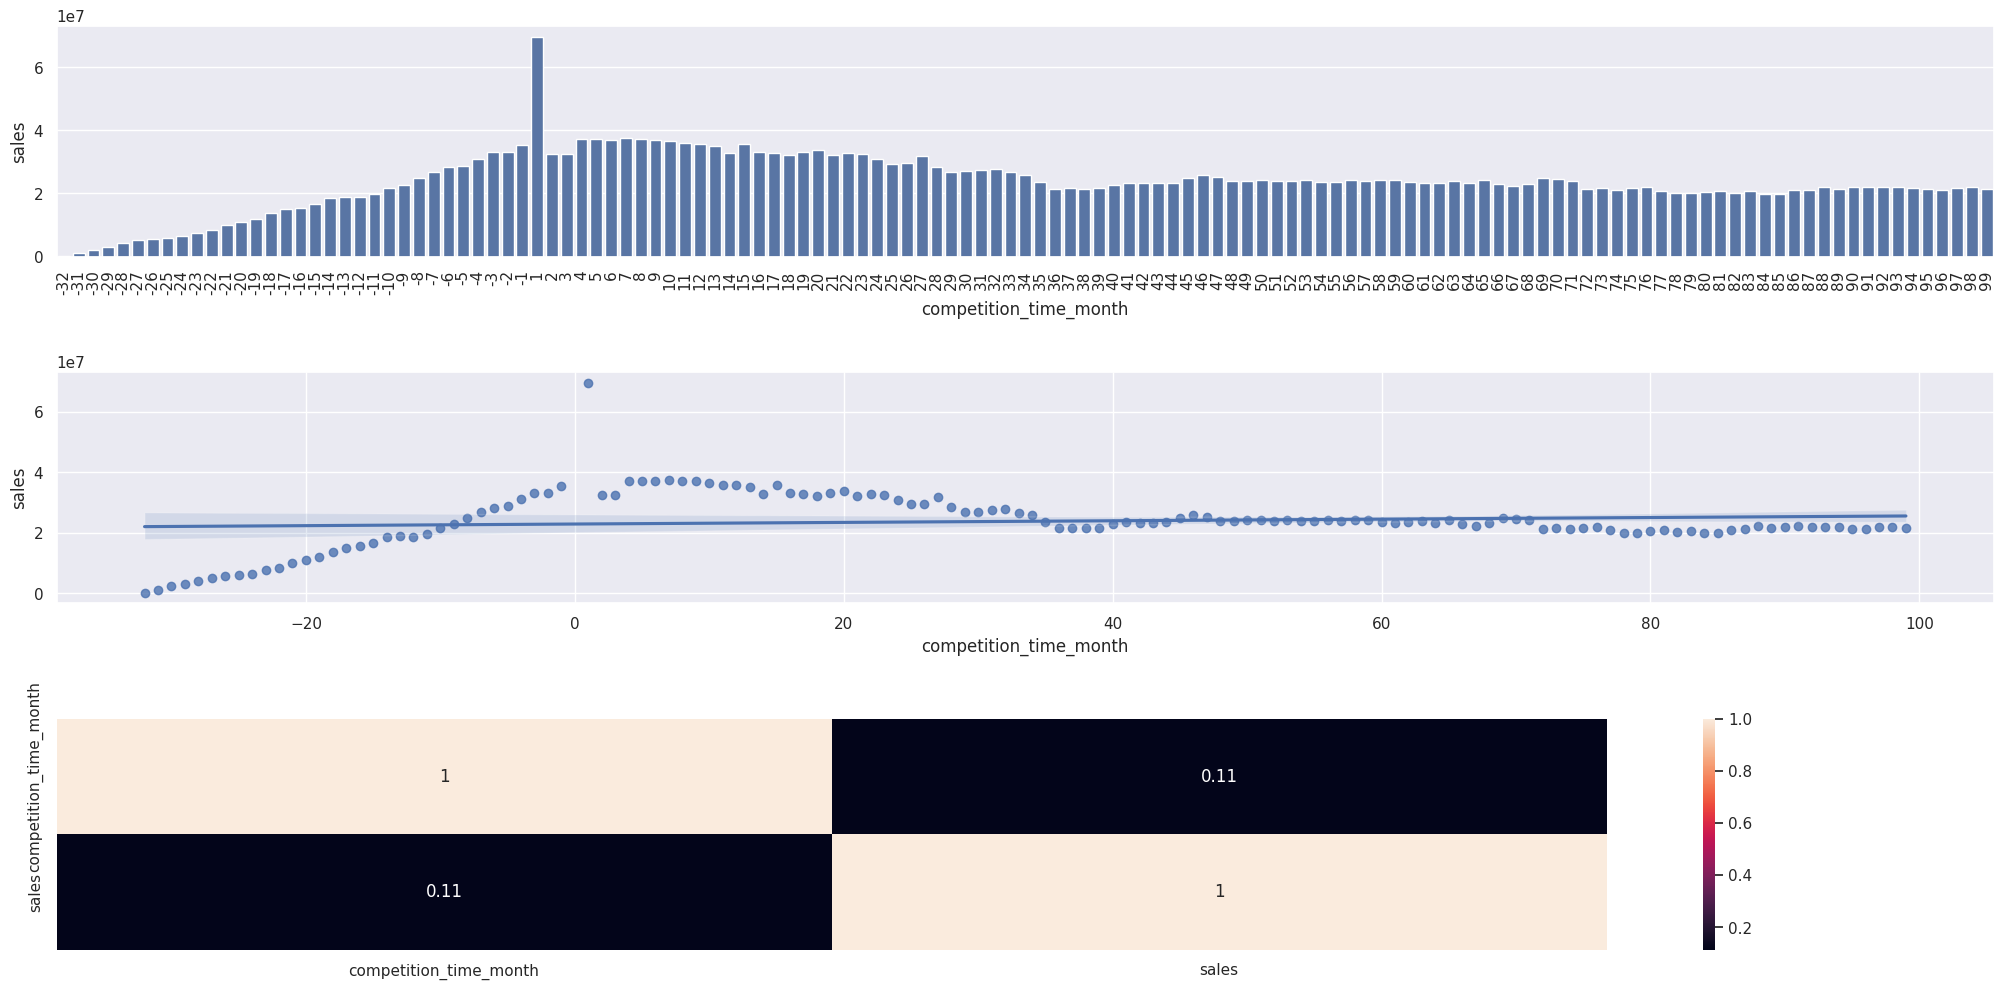

In [34]:
fig, axs = plt.subplots( 3, 1, sharex=False )


df_aux = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
df_aux2 = df_aux[ ( df_aux['competition_time_month'] < 100 ) & ( df_aux['competition_time_month'] != 0 ) ]
sns.barplot( data=df_aux2, x='competition_time_month', y='sales', ax=axs[0]);
axs[0].tick_params( 'x', rotation=90 )

sns.regplot( x='competition_time_month', y='sales', data=df_aux2, ax=axs[1] );

sns.heatmap( df_aux2.corr( method='pearson' ), annot=True, ax=axs[2]);

fig.subplots_adjust(hspace=0.5)

### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.

**FALSA** Lojas com promoções ativas por mais tempo vendem menos, depois de um certo período de promoção.

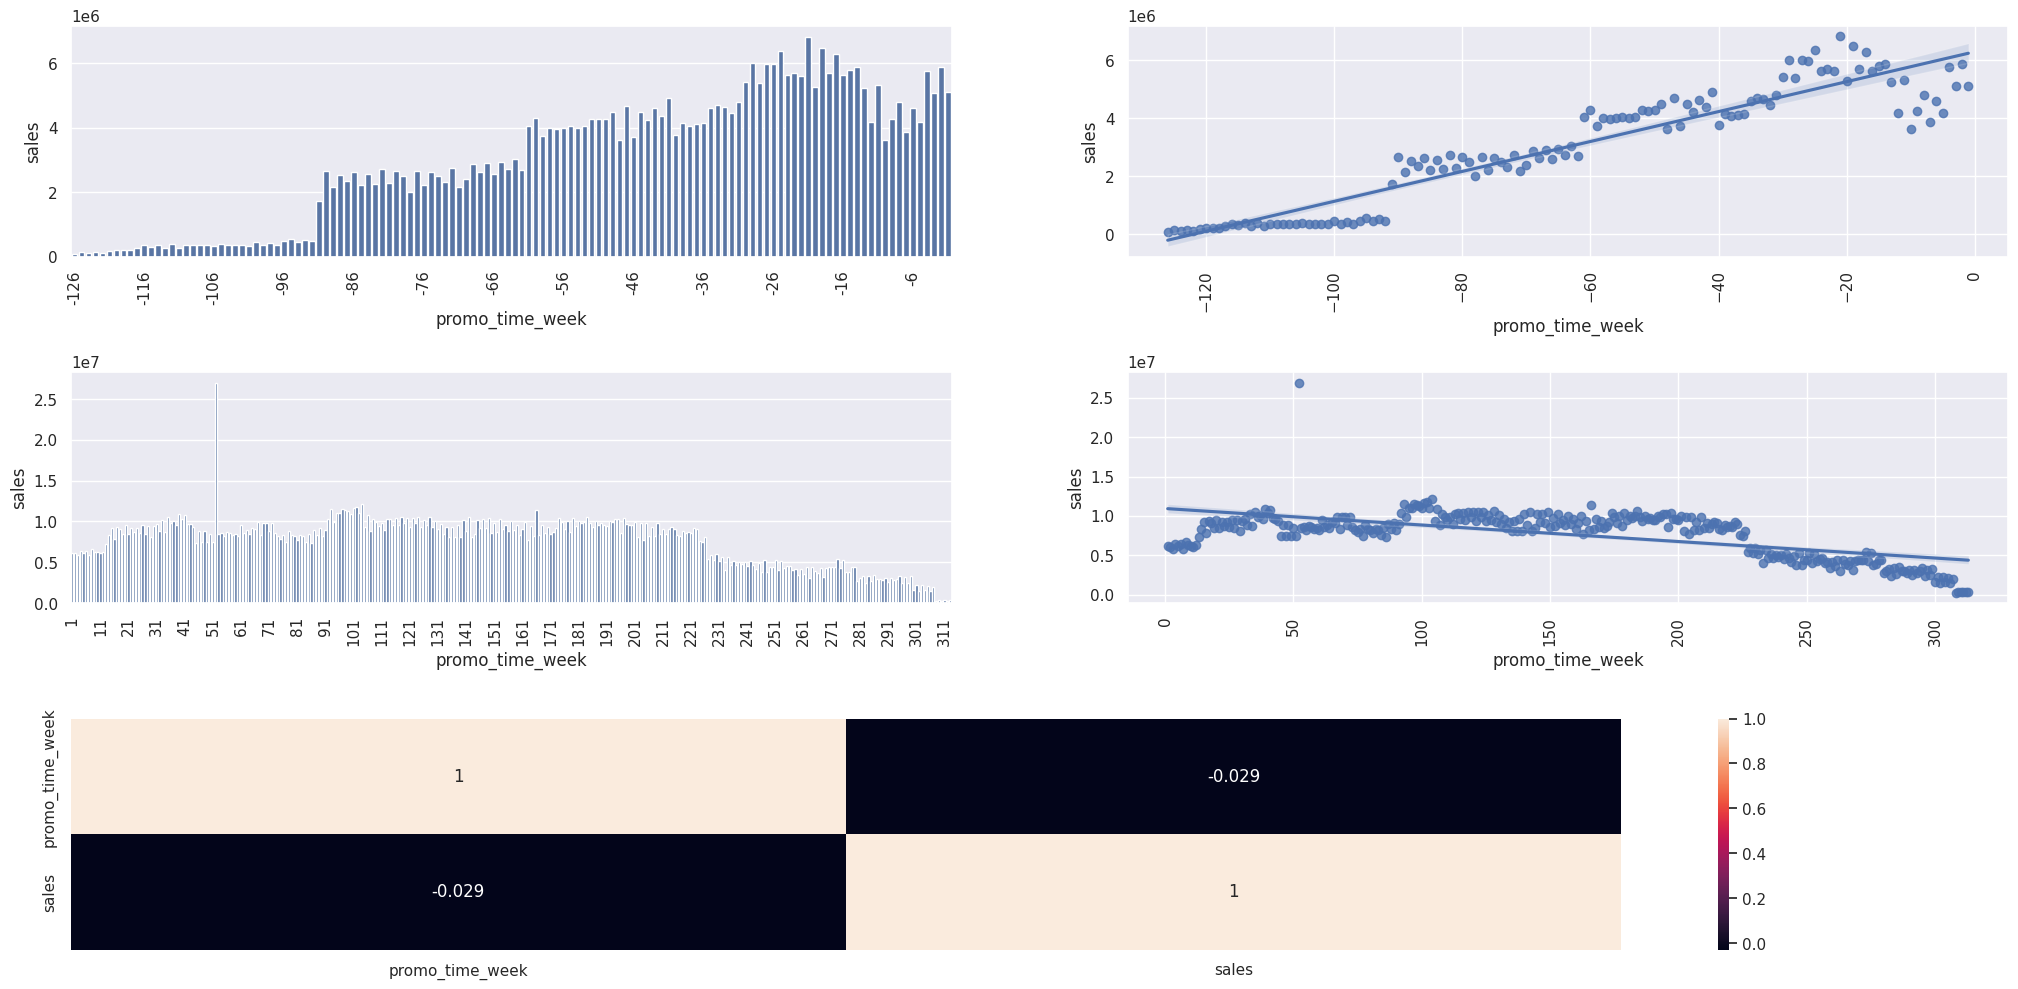

In [35]:
df_aux = df4[['promo_time_week', 'sales']].groupby( 'promo_time_week' ).sum().reset_index()

grid = plt.GridSpec( 3, 2, hspace=0.5 )

aux_regular = df_aux[( df_aux['promo_time_week'] < 0 )]
aux_extendida = df_aux[( df_aux['promo_time_week'] > 0 ) ]

fig = plt.figure()


ax1 = fig.add_subplot( grid[0, 0] )
sns.barplot( data=aux_regular, x='promo_time_week', y='sales', ax=ax1 );
ticks_loc = ax1.get_xticks()[::10]
ticks_labels = [label.get_text() for label in ax1.get_xticklabels()][::10]
ax1.set_xticks(ticks_loc)
ax1.set_xticklabels(ticks_labels, rotation=90)

ax2 = fig.add_subplot( grid[0, 1] )
sns.regplot( data=aux_regular, x='promo_time_week', y='sales', ax=ax2 );
ax2.tick_params('x', rotation=90)

ax3 = fig.add_subplot( grid[1, 0] )
sns.barplot( data=aux_extendida, x='promo_time_week', y='sales', ax=ax3 );
ticks_loc = ax3.get_xticks()[::10]
ticks_labels = [label.get_text() for label in ax3.get_xticklabels()][::10]
ax3.set_xticks(ticks_loc)
ax3.set_xticklabels(ticks_labels, rotation=90)

ax4 = fig.add_subplot( grid[1, 1] )
sns.regplot( data=aux_extendida, x='promo_time_week', y='sales', ax=ax4 );
ax4.tick_params('x', rotation=90)

ax4 = fig.add_subplot( grid[2, :] )
sns.heatmap( df_aux.corr( method='pearson' ), annot=True );


### H5. Lojas com mais promoções consecutivas deveriam vender mais.

**FALSA** Lojas com promoções ativas por mais tempo vendem menos, depois de um certo período de promoção.

In [36]:
aux = df4[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().sort_values('sales', ascending=False).reset_index()

conditions = [
    (aux['promo'] == 0) & (aux['promo2'] == 0),
    (aux['promo'] == 0) & (aux['promo2'] == 1),
    (aux['promo'] == 1) & (aux['promo2'] == 0),
    (aux['promo'] == 1) & (aux['promo2'] == 1)
]

values = ["Sem promoção", "Extendida", "Tradicional", "Tradicional e Extendida"]

aux['legenda'] = np.select(conditions, values)

aux

,promo,promo2,sales,legenda
0,1,0,1628930532,Tradicional
1,0,0,1482612096,Sem promoção
2,1,1,1472275754,Tradicional e Extendida
3,0,1,1289362241,Extendida


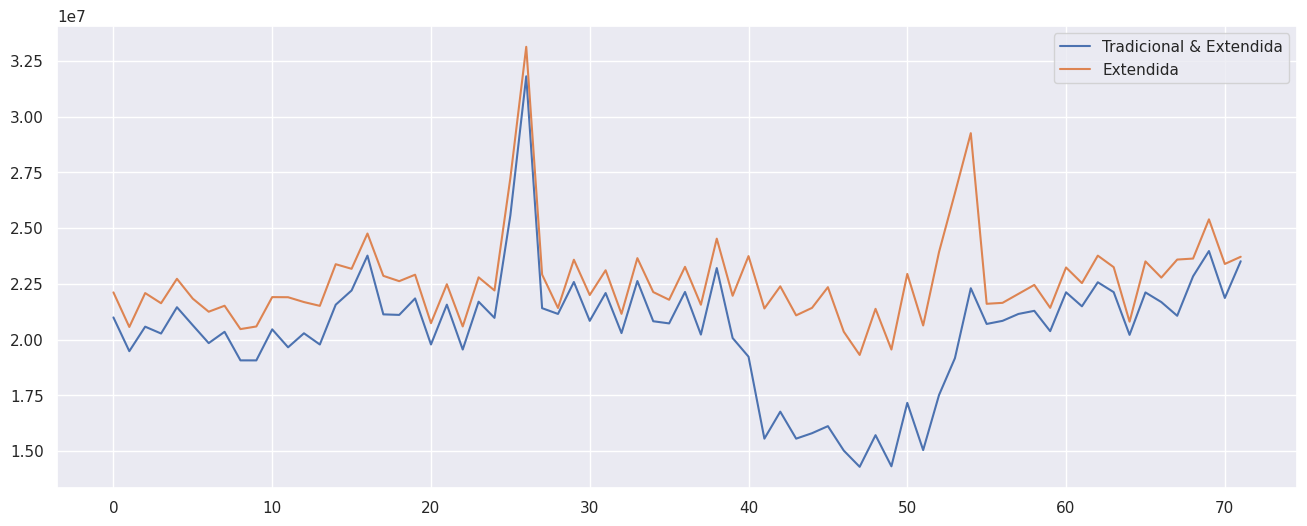

In [37]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot( figsize=(16,6))

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Extendida'] );

### H6. Lojas abertas durante o feriado de Natal deveriam vender mais.

**FALSA** Lojas abertas durante o feriado de Natal vendem menos

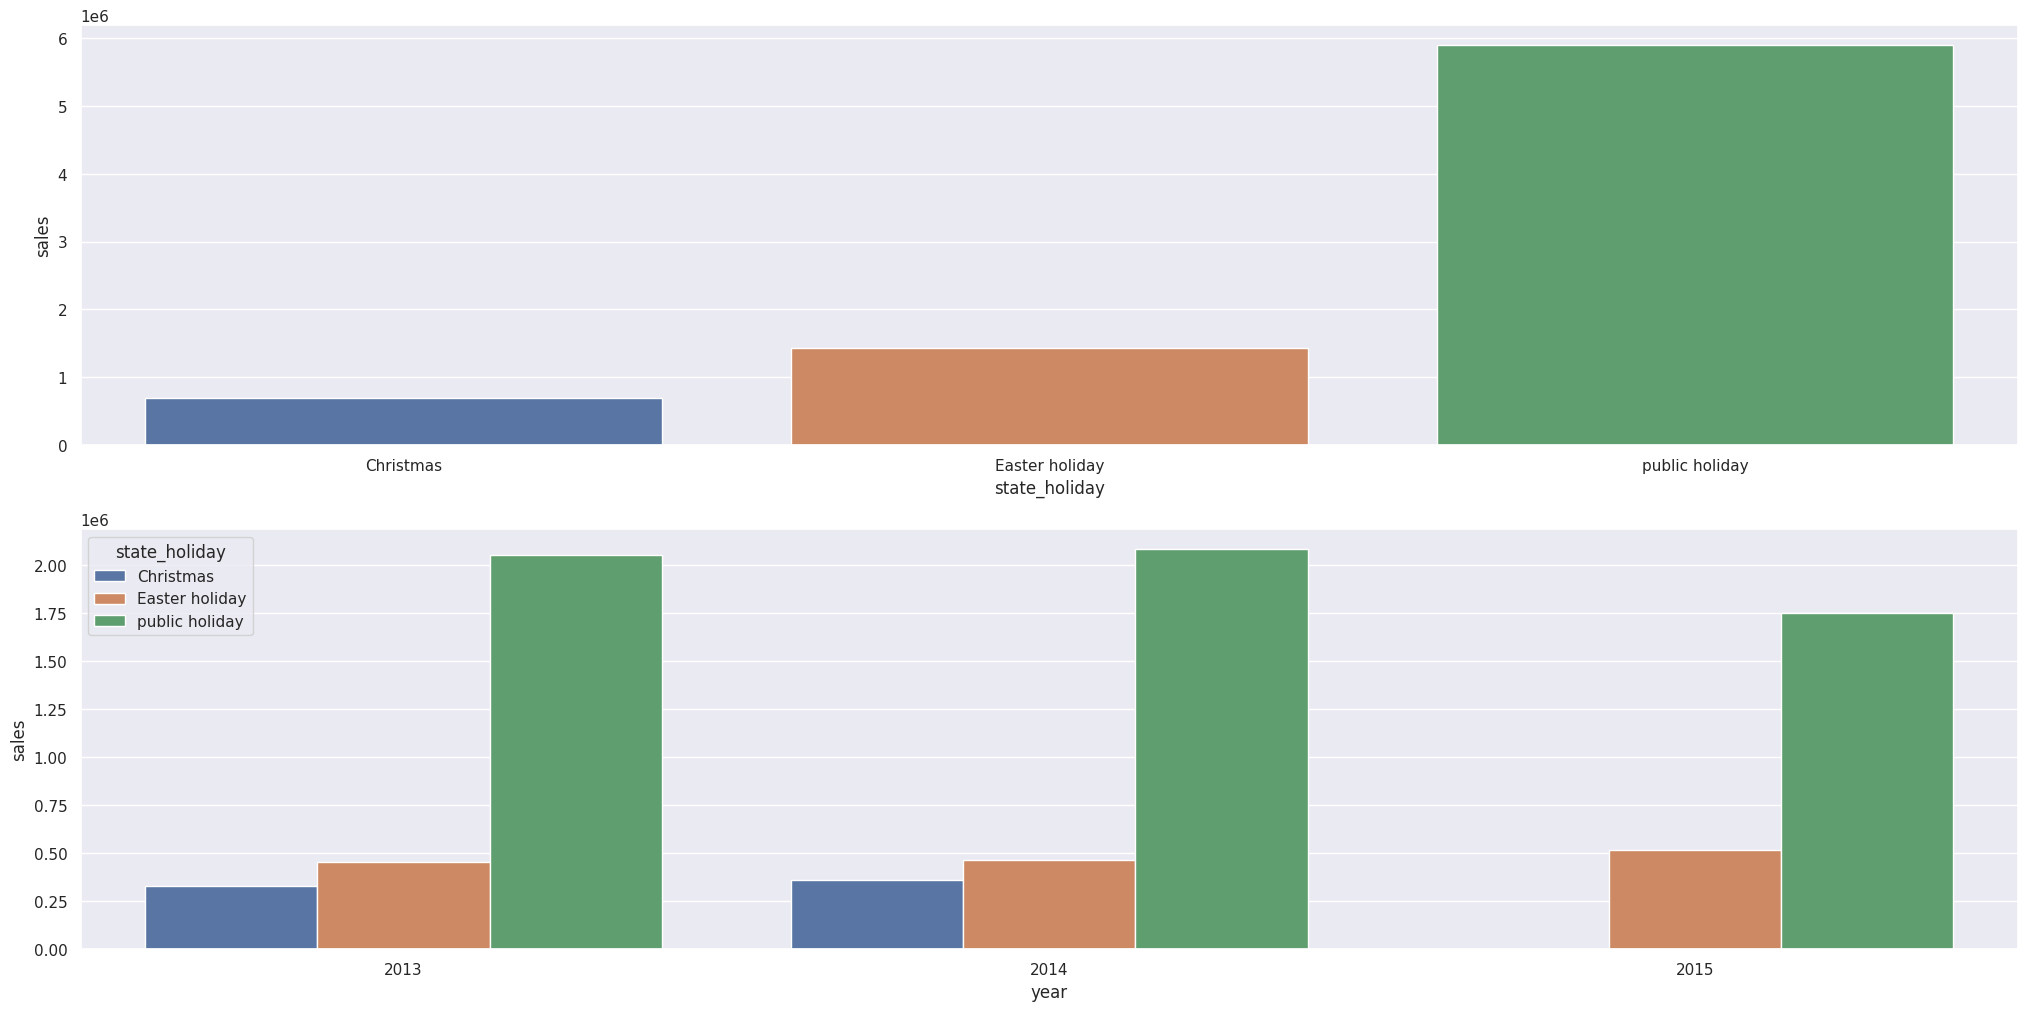

<Figure size 1600x500 with 0 Axes>

In [38]:
aux = df4[df4['state_holiday'] != 'regular_day']

df_aux = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()

fig, axs = plt.subplots( 2, 1, sharex=False )

plt.figure( figsize=(16,5));
sns.barplot( data=df_aux, x='state_holiday', y='sales', hue='state_holiday', ax=axs[0] );

aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( data=aux2, x='year', y='sales', hue='state_holiday', ax=axs[1] );

### H7. Lojas deveriam vender mais ao longo dos anos.

**FALSA** 

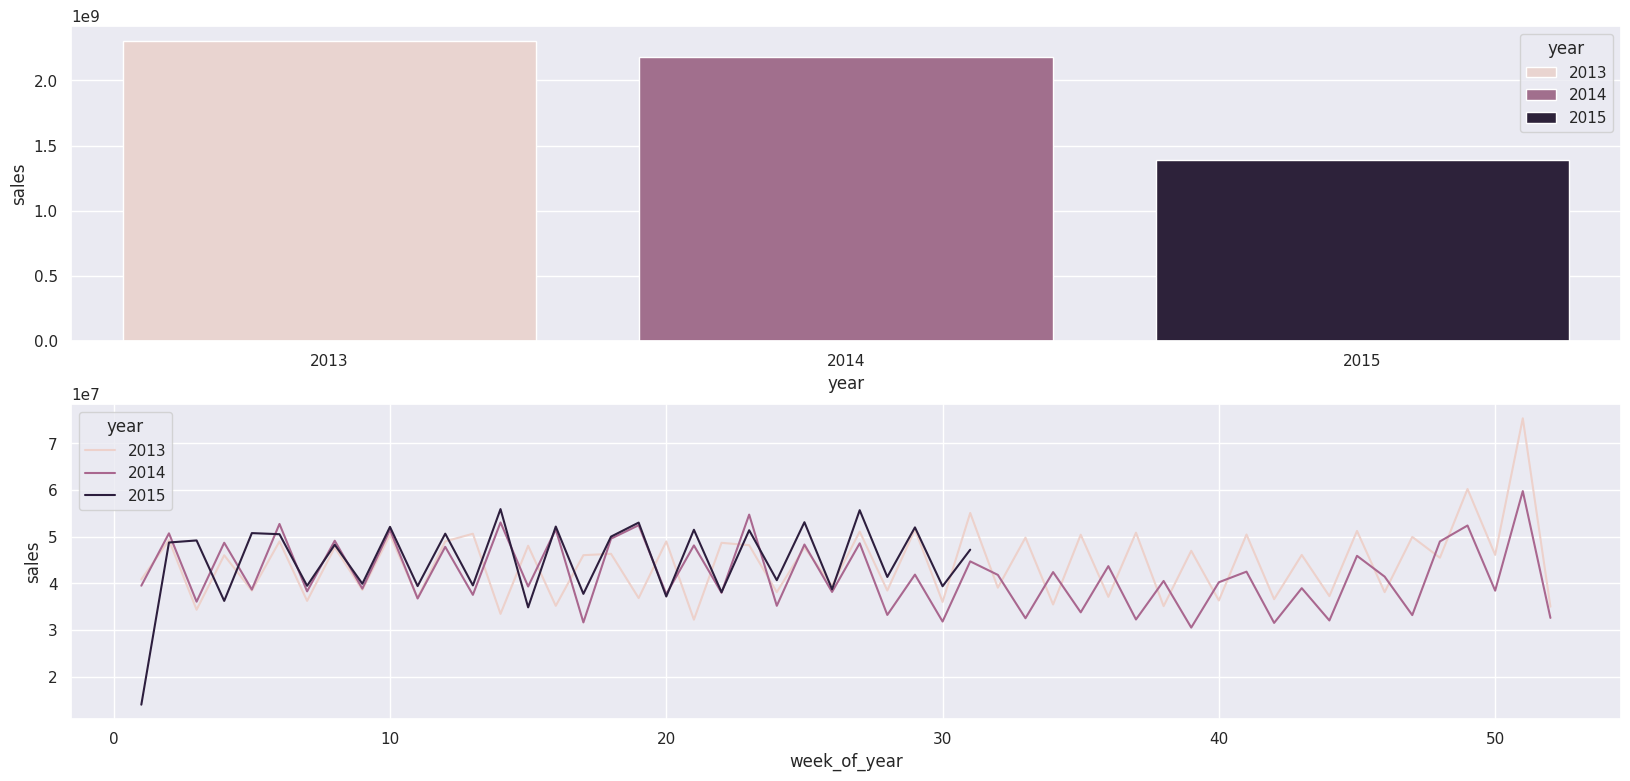

In [39]:
aux = df4[['year', 'sales']].groupby( 'year' ).sum().reset_index().sort_values('sales', ascending=False)


fig, axs = plt.subplots( 2, 1, sharex=False, figsize=(20,9) )

sns.barplot( data=aux, x='year', y='sales', hue='year', ax=axs[0])

aux2 = df4[['week_of_year', 'sales', 'year']].groupby( ['week_of_year', 'year'] ).sum().reset_index()


sns.lineplot( data=aux2, x='week_of_year', y='sales', hue='year', ax=axs[1] );

### H8. Lojas deveriam vender mais no segundo semestre do ano.

**FALSA** 

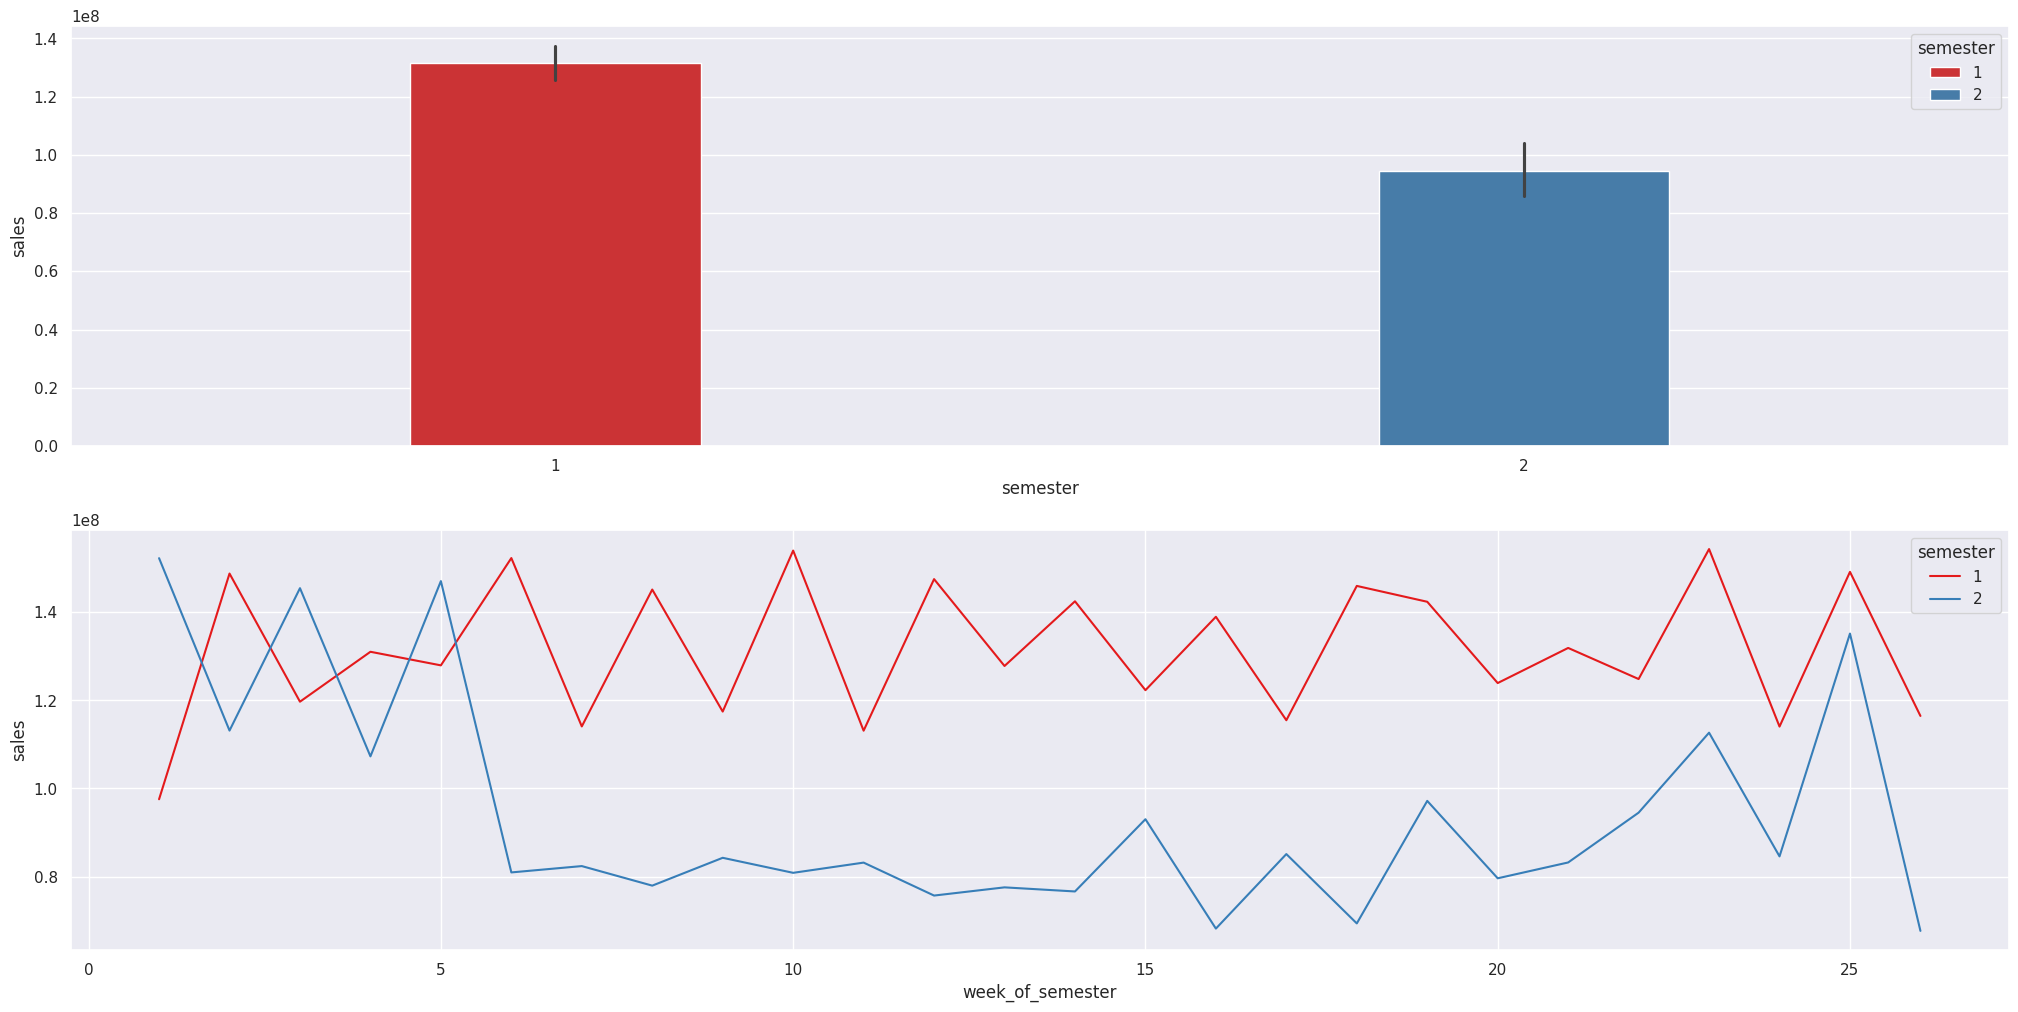

In [50]:
df_aux = df4[df4['year'] != '2015']

df_aux['semester'] = df_aux.apply( lambda x: 1 if x['month'] <= 6 else 2, axis=1)
df_aux['week_of_semester'] = df_aux['week_of_year'].apply(lambda x: x if x <= 26 else x - 26)

fig, axs = plt.subplots( 2, 1, sharex=False)

aux = df_aux[['semester', 'sales', 'week_of_semester']].groupby( ['semester', 'week_of_semester'] ).sum().reset_index()
sns.barplot( data=aux, x='semester', y='sales', hue='semester', ax=axs[0], width=0.3, palette='Set1' );

sns.lineplot( data=aux, x='week_of_semester', y='sales', hue='semester', ax=axs[1], palette='Set1' );

### H9. Lojas deveriam vender mais depois do dia 10 de cada mês.

**FALSA** 

In [44]:
df4.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


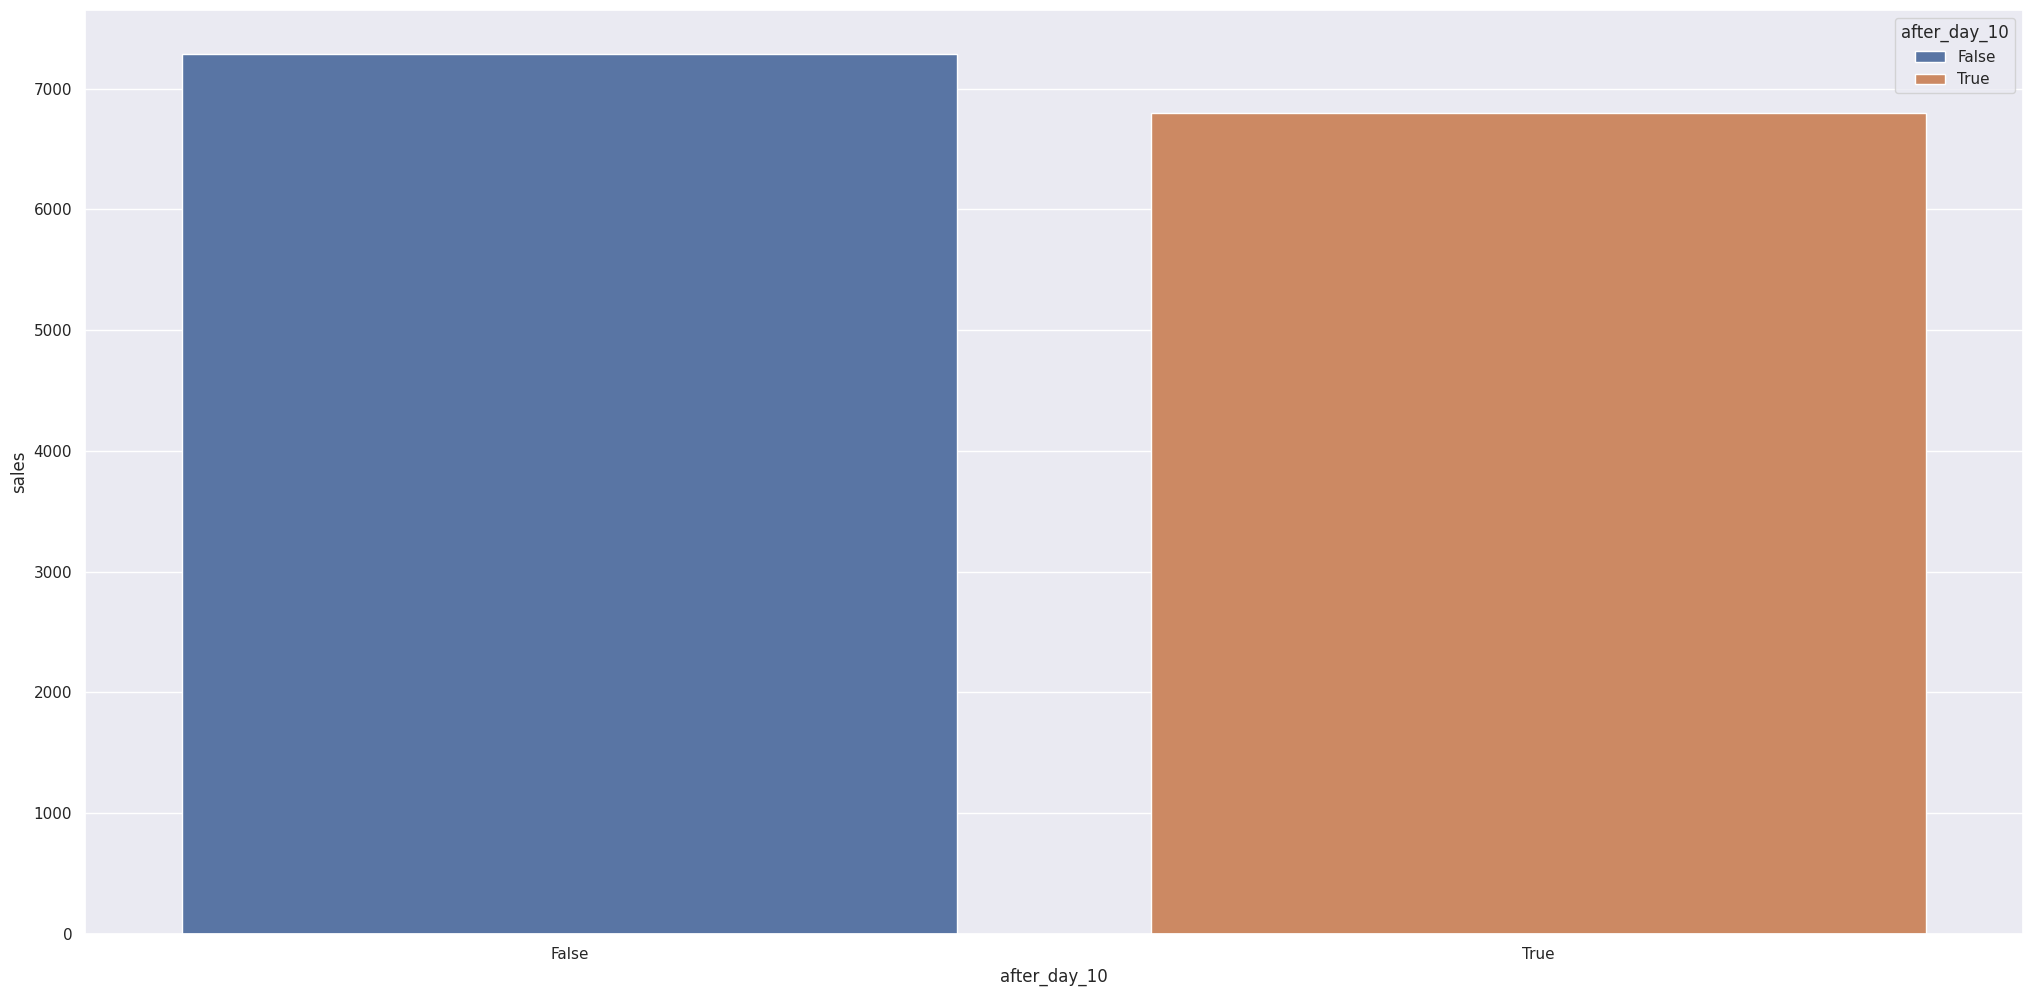

In [58]:
df_aux = df4.copy()

df_aux['after_day_10'] = df_aux['day'].apply( lambda x: True if x > 10 else False )

aux = df_aux[['after_day_10', 'sales']].groupby( 'after_day_10' ).mean().reset_index()

sns.barplot( data=aux, x='after_day_10', y='sales', hue='after_day_10' );


In [59]:
df_aux[['day', 'after_day_10']].head(20)

,day,after_day_10
0,31,True
1,31,True
2,31,True
3,31,True
4,31,True
5,31,True
6,31,True
7,31,True
8,31,True
9,31,True


In [47]:
df_aux[['day', 'after_day_10']].sample(20)

,day,after_day_10
674107,4,False
703255,9,False
571886,4,False
215096,20,True
77660,23,True
277355,18,True
961263,20,True
35322,30,True
740470,6,False
857464,24,True


### H10. Lojas deveriam vender menos aos finais de semana.

**FALSA** 

### H11. Lojas deveriam vender menos durante feriados escolares.

**FALSA** 

## 4.3. Análise Multivariada

In [41]:
# Extrair as cores do palette 'Set2'
palette = sns.color_palette('Set3')

# Mostrar os códigos das cores em formato hexadecimal
hex_colors = [mcolors.rgb2hex(color) for color in palette]
for i, hex_color in enumerate(hex_colors):
    print(f"Color {i}: {hex_color}")

NameError: name 'mcolors' is not defined